# Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns

## Reading the our DT

In [2]:
DataTr=pd.read_csv("DT/train.csv")
DataTs=pd.read_csv("DT/test.csv")
DataTrMod=pd.read_csv("DT/train.csv")

### General Information

In [3]:
DataTr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35995 entries, 0 to 35994
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              35995 non-null  int64  
 1   Province_State  15295 non-null  object 
 2   Country_Region  35995 non-null  object 
 3   Date            35995 non-null  object 
 4   ConfirmedCases  35995 non-null  float64
 5   Fatalities      35995 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ MB


#### Head

In [4]:
DataTr.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


#### Tail

In [5]:
DataTr.tail()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
35990,35991,NaN,Zimbabwe,2020-05-11,36.0,4.0
35991,35992,NaN,Zimbabwe,2020-05-12,36.0,4.0
35992,35993,NaN,Zimbabwe,2020-05-13,37.0,4.0
35993,35994,NaN,Zimbabwe,2020-05-14,37.0,4.0
35994,35995,NaN,Zimbabwe,2020-05-15,42.0,4.0


In [6]:
print(DataTr.corr())

                      Id  ConfirmedCases  Fatalities
Id              1.000000        0.069018    0.049932
ConfirmedCases  0.069018        1.000000    0.890192
Fatalities      0.049932        0.890192    1.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_12216\3033900440.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(DataTr.corr())


In [7]:
print(np.std(DataTr)) 

Id                10390.861466
ConfirmedCases    18986.714961
Fatalities         1832.941538
dtype: float64


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


### Traiting null values

In [8]:
DataTr.isnull().sum()

Id                    0
Province_State    20700
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

Observation: We see that 'Province_State'column has a 20700/35994, it's more than half the column ==> that's why we need to drop it 

In [9]:
DataTs.isnull().sum()

ForecastId           0
Province_State    7740
Country_Region       0
Date                 0
dtype: int64

Observation: same as the DataTs

## Droping null values

In [10]:
DataTr.drop('Province_State', inplace=True, axis=1)
DataTs.drop('Province_State', inplace=True, axis=1)
DataTrMod.drop('Province_State', inplace=True, axis=1)



In [11]:
DataTr.set_index('Date', inplace=True)


dfC=pd.pivot_table(DataTr,columns='Country_Region',
                     index='Date',
                     values='ConfirmedCases',
                     aggfunc=np.sum)
print(dfC)

dfF=pd.pivot_table(DataTr,
                              columns='Country_Region',
                              index='Date',
                              values='Fatalities',
                              aggfunc=np.sum)
print(dfF)                              
country_list=[]
value_list=[]
fatality_list=[]

for country in list(dfC.columns):
    country_list.append(country)
    value_list.append(dfC[country].max())
    fatality_list.append(dfF[country].max())
    new={'Country':country_list,'Confirmed':value_list,'Fatality':fatality_list}

df=pd.DataFrame.from_dict(new)
df.set_index('Country',inplace=True)
print("________________________________________________________________")
print(df)

Country_Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                             
2020-01-22              0.0      0.0      0.0      0.0     0.0   
2020-01-23              0.0      0.0      0.0      0.0     0.0   
2020-01-24              0.0      0.0      0.0      0.0     0.0   
2020-01-25              0.0      0.0      0.0      0.0     0.0   
2020-01-26              0.0      0.0      0.0      0.0     0.0   
...                     ...      ...      ...      ...     ...   
2020-05-11           4687.0    872.0   5891.0    755.0    45.0   
2020-05-12           4963.0    876.0   6067.0    758.0    45.0   
2020-05-13           5226.0    880.0   6253.0    760.0    45.0   
2020-05-14           5639.0    898.0   6442.0    761.0    48.0   
2020-05-15           6053.0    916.0   6629.0    761.0    48.0   

Country_Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
Date                                                          

In [12]:
or_conf = df.sort_values(by=['Confirmed'],ascending=False)
or_fat = df.sort_values(by=['Fatality'],ascending=False)
topconf = or_conf.head(10)
topFat=or_fat.head(10)
print("________________________________________________________")
print(topconf)
print(topFat)


________________________________________________________
                Confirmed  Fatality
Country                            
US              1442653.0   87525.0
Russia           262843.0    2418.0
United Kingdom   238004.0   34078.0
Spain            230183.0   27459.0
Italy            223885.0   31610.0
Brazil           220291.0   14962.0
France           179630.0   27532.0
Germany          175233.0    7897.0
Turkey           146457.0    4055.0
Iran             116635.0    6902.0
                Confirmed  Fatality
Country                            
US              1442653.0   87525.0
United Kingdom   238004.0   34078.0
Italy            223885.0   31610.0
France           179630.0   27532.0
Spain            230183.0   27459.0
Brazil           220291.0   14962.0
Belgium           54644.0    8959.0
Germany          175233.0    7897.0
Iran             116635.0    6902.0
Canada            75945.0    5678.0


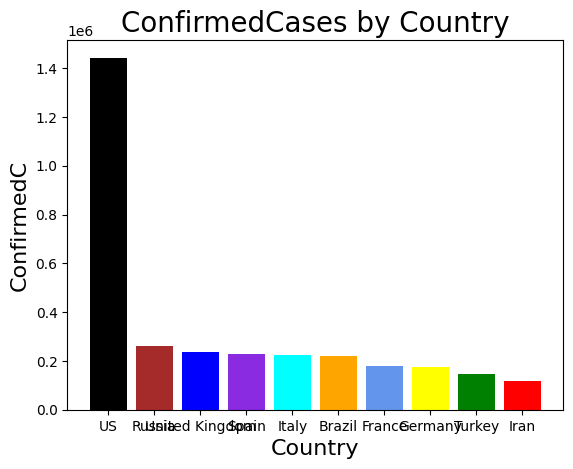

In [13]:
fig, ax = plt.subplots()

plt.bar(topconf.index,topconf['Confirmed'],color=['black','brown','blue', 'blueviolet', 'aqua','orange', 'cornflowerblue', 'yellow','green','red'] ) 
             
plt.title('ConfirmedCases by Country', size='20')

plt.xlabel('Country', size='16')
plt.ylabel('ConfirmedC', size='16')
plt.show()


Observation: US has the highest constration of confirmed cases

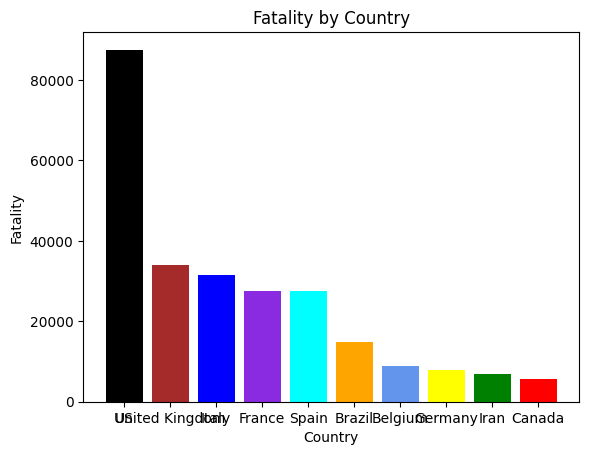

In [14]:
plt.bar(topFat.index,topFat['Fatality'], color=['black','brown','blue', 'blueviolet', 'aqua','orange', 'cornflowerblue', 'yellow','green','red']) 

plt.title('Fatality by Country')
plt.xlabel('Country')
plt.ylabel('Fatality')
plt.show()


Observation: Also for the Fatalities the US still in the lead

In [15]:
listC=list(topconf.index)
listC.append('India')
listC.append('Pakistan')
listC.append('China') #the beginnig of the covid19
print("--------------------------------------------------")
print(listC)

--------------------------------------------------
['US', 'Russia', 'United Kingdom', 'Spain', 'Italy', 'Brazil', 'France', 'Germany', 'Turkey', 'Iran', 'India', 'Pakistan', 'China']


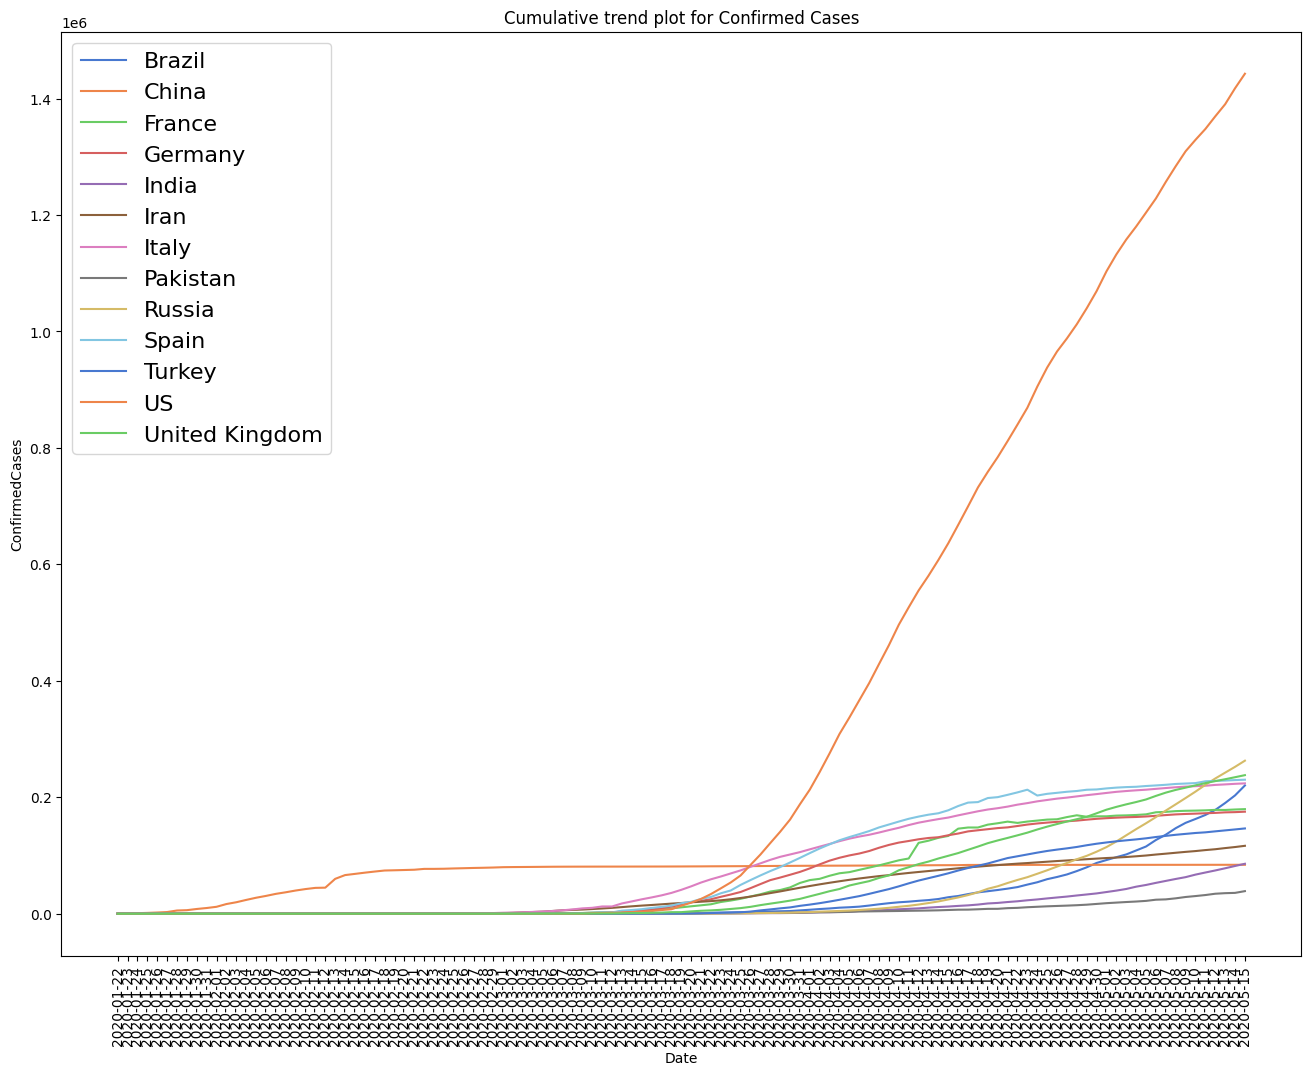

In [16]:
timesercntr = DataTr.groupby(['Date','Country_Region'])['ConfirmedCases'].sum()\
                    .reset_index().set_index('Date')
dfcountries= timesercntr[timesercntr['Country_Region'].isin(listC)]


plt.figure(figsize=(16,12))
ax = sns.lineplot(x=dfcountries.index, 
                  y="ConfirmedCases", 
                  hue="Country_Region", 
                  data=dfcountries,palette='muted').set_title('Cumulative line')

plt.legend(loc=2, prop={'size': 16})
plt.title('Cumulative trend plot for Confirmed Cases')
plt.xticks(rotation=90)
plt.show()

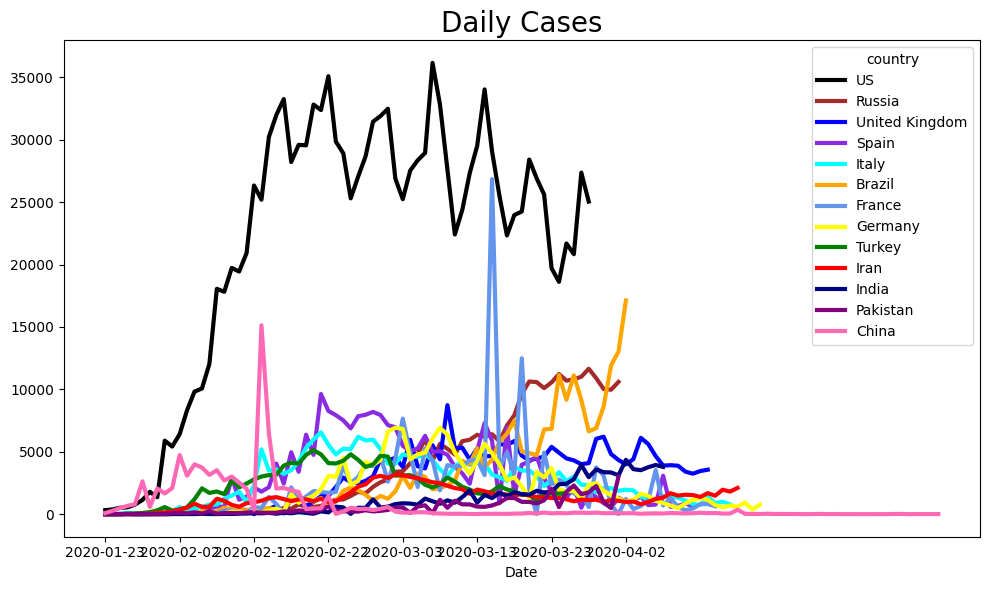

In [17]:
plt.figure(figsize=(10,6))
colors=['black','brown','blue', 'blueviolet', 'aqua','orange', 'cornflowerblue', 'yellow','green','red','navy','purple','hotpink']
for i,country in enumerate(listC):
    Dcases=dfC[dfC[country]>0][country].diff().fillna(0)
    Dcases=Dcases[Dcases>0]
    Dcases.plot(color=colors[i],label=country,markersize=8,lw=3)   
    plt.title('Daily Cases',fontsize=20)
    plt.legend(title='country')
plt.tight_layout()
plt.show()


Observation: US has the highest daily cases record at 36000 cnfirmed cases

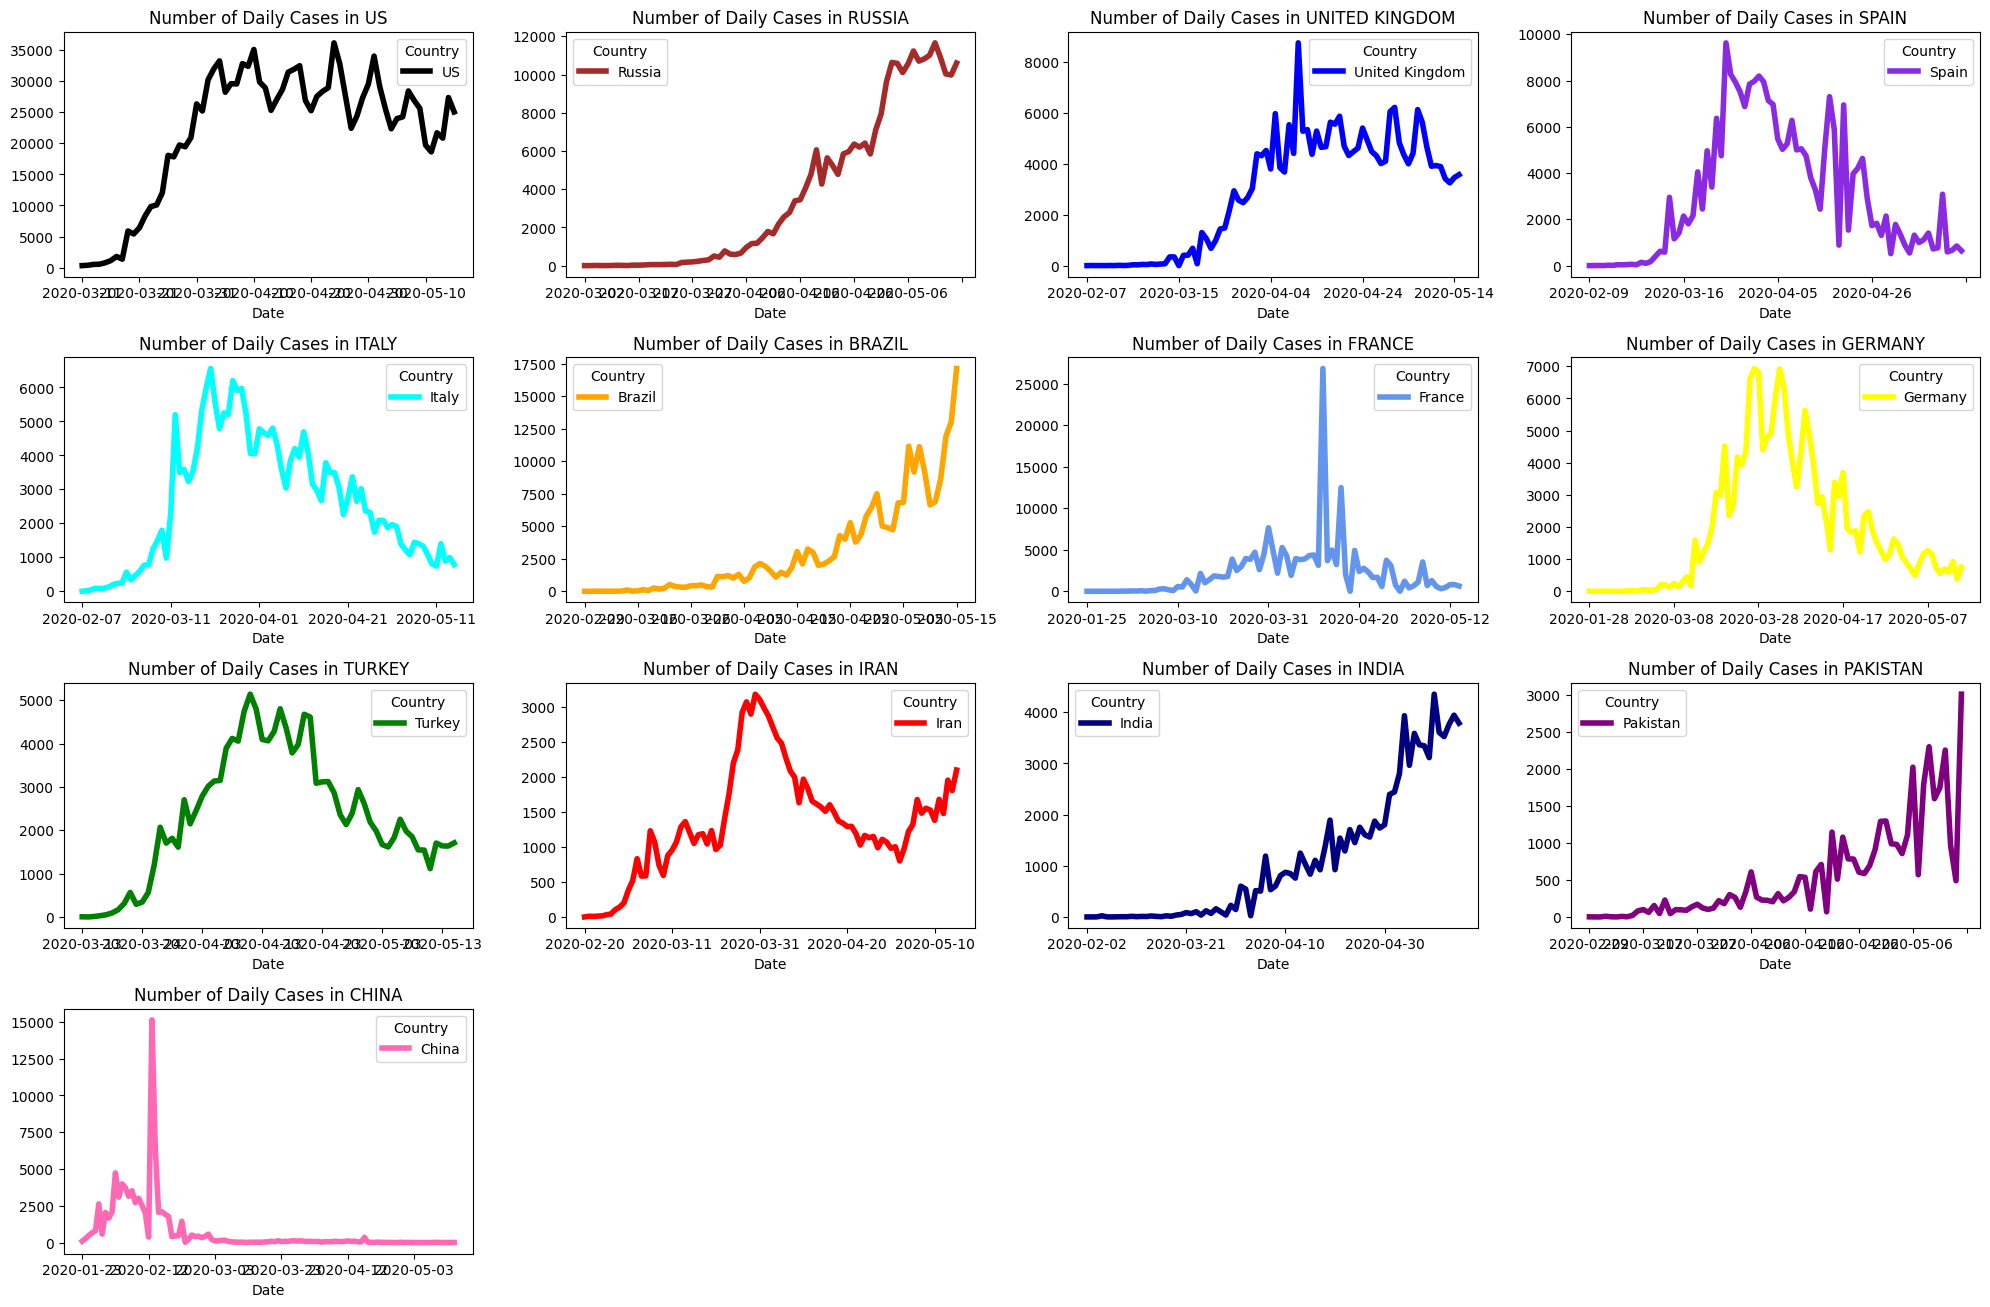

In [18]:
plt.figure(figsize=(20,16))
colors=['black','brown','blue', 'blueviolet', 'aqua','orange', 'cornflowerblue', 'yellow','green','red','navy','purple','hotpink']
for i,country in enumerate(listC):
    Dcases=dfC[dfC[country]>0][country].diff()
    Dcases=Dcases[Dcases>0]
    plt.subplot(5,4,i+1)
    Dcases.plot(color=colors[i],label=country,markersize=20,lw=4)    
    plt.xticks()
    plt.legend(title='Country')
    print(end='')
    plt.title('Number of Daily Cases in {}'.format(country.upper()))
plt.tight_layout()
plt.show()


Observation:

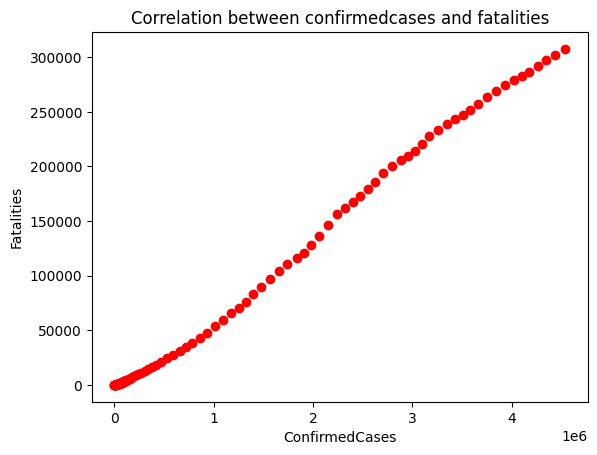

In [19]:
ConfC=DataTr.groupby('Date')['ConfirmedCases'].sum()
Fatali=DataTr.groupby('Date')['Fatalities'].sum()
fig, ax = plt.subplots()
ax.scatter(x=ConfC , y= Fatali ,color='r')
ax.set_title('Correlation between confirmedcases and fatalities')
ax.set_xlabel('ConfirmedCases')
ax.set_ylabel('Fatalities')
plt.show()


In [20]:
DataTr.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12216\3515472479.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DataTr.corr()


,Id,ConfirmedCases,Fatalities
Id,1.000000,0.069018,0.049932
ConfirmedCases,0.069018,1.000000,0.890192
Fatalities,0.049932,0.890192,1.000000


Observation: We see that the correlation between the confirmed cases and fatalites =0,89 close to 1 ==> witch means that as the confirmed cases rises the falaies raises also

## Model and Predection

#### Transforming the dates to numurical values

In [21]:
DataTrMod.drop('Id', inplace=True, axis=1)
DataTrMod

,Country_Region,Date,ConfirmedCases,Fatalities
0,Afghanistan,2020-01-22,0.0,0.0
1,Afghanistan,2020-01-23,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...
35990,Zimbabwe,2020-05-11,36.0,4.0
35991,Zimbabwe,2020-05-12,36.0,4.0
35992,Zimbabwe,2020-05-13,37.0,4.0
35993,Zimbabwe,2020-05-14,37.0,4.0


In [22]:
def split_date(date):
    date = date.split('-')
    date[0] = int(date[0])
    if(date[1][0] == '0'):
        date[1] = int(date[1][1])
    else:
        date[1] = int(date[1])
    if(date[2][0] == '0'):
        date[2] = int(date[2][1])
    else:
        date[2] = int(date[2])    
    return date



In [23]:
DataTrMod['Date'] = pd.to_datetime(DataTrMod.Date, format='%Y-%m-%d')
DataTrMod['Day']=DataTrMod['Date'].dt.day
DataTrMod['Month']=DataTrMod['Date'].dt.month
DataTrMod['Year']=DataTrMod['Date'].dt.year

In [24]:
del DataTrMod['Date']


In [25]:
DataTs['Date'] = pd.to_datetime(DataTs.Date, format='%Y-%m-%d')
DataTs['Day']=DataTs['Date'].dt.day
DataTs['Month']=DataTs['Date'].dt.month
DataTs['Year']=DataTs['Date'].dt.year



In [26]:
del DataTs['Date']
del DataTs['ForecastId']

In [27]:
del DataTrMod['Year']
del DataTs['Year']

In [28]:
DataTrMod['ConfirmedCases'] = DataTrMod['ConfirmedCases'].apply(int)
DataTrMod['Fatalities'] = DataTrMod['Fatalities'].apply(int)
cases = DataTrMod.ConfirmedCases
fatalities = DataTrMod.Fatalities
del DataTrMod['ConfirmedCases']
del DataTrMod['Fatalities']

In [35]:


pip install -U scikit-learn


     ---------------------------------------- 8.3/8.3 MB 35.0 kB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     --------------------------------------- 42.5/42.5 MB 25.2 kB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [36]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder,StandardScaler,MinMaxScaler

In [ ]:
lb = LabelEncoder()
DataTrMod['Country_Region'] = lb.fit_transform(DataTrMod['Country_Region'])
DataTs['Country_Region'] = lb.transform(DataTs['Country_Region'])